In [174]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [175]:
df = pd.read_csv('/Users/Ajwad/Desktop/NBM_Regression_Gamma/yellow_tripdata_2021-03.csv') # Load tha dataset
df

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2021-03-01 00:22:02,2021-03-01 00:23:22,1.0,0.00,1.0,N,264,264,2.0,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0
1,2.0,2021-03-01 00:24:48,2021-03-01 00:24:56,1.0,0.00,1.0,N,152,152,2.0,2.50,0.50,0.5,0.00,0.00,0.3,3.80,0.0
2,2.0,2021-03-01 00:25:17,2021-03-01 00:31:01,1.0,0.00,1.0,N,152,152,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
3,1.0,2021-03-01 00:07:40,2021-03-01 00:31:23,0.0,16.50,4.0,N,138,265,1.0,51.00,0.50,0.5,11.65,6.12,0.3,70.07,0.0
4,2.0,2021-03-01 00:02:13,2021-03-01 00:06:01,1.0,1.13,1.0,N,68,264,1.0,5.50,0.50,0.5,1.86,0.00,0.3,11.16,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925147,NaN,2021-03-29 12:39:29,2021-03-29 13:06:30,NaN,13.18,NaN,NaN,135,75,NaN,34.76,2.75,0.5,0.00,6.12,0.3,44.43,0.0
1925148,NaN,2021-03-29 12:11:00,2021-03-29 12:28:00,NaN,2.60,NaN,NaN,107,163,NaN,18.34,2.75,0.5,0.00,0.00,0.3,21.89,0.0
1925149,NaN,2021-03-29 12:50:00,2021-03-29 13:14:00,NaN,5.50,NaN,NaN,137,17,NaN,37.76,2.75,0.5,0.00,0.00,0.3,41.31,0.0
1925150,NaN,2021-03-29 12:12:00,2021-03-29 12:32:00,NaN,3.78,NaN,NaN,177,85,NaN,-1.55,2.75,0.5,0.00,23.50,0.3,25.50,0.0


In [176]:
df.shape

(1925152, 18)

In [177]:
#X, y = df.drop('total_amount',axis=1), df['total_amount']

#X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
df_train , df_test = train_test_split(df , test_size=.2, random_state=10)

In [178]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=5)
df_train, df_val = train_test_split(df_train, test_size=.25, random_state=5)

In [ ]:
#------ Clean_train ---------------

In [179]:
df_train.shape

(1155090, 18)

In [180]:
df_train.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155090 entries, 964410 to 36587
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1078366 non-null  float64
 1   tpep_pickup_datetime   1155090 non-null  object 
 2   tpep_dropoff_datetime  1155090 non-null  object 
 3   passenger_count        1078366 non-null  float64
 4   trip_distance          1155090 non-null  float64
 5   RatecodeID             1078366 non-null  float64
 6   store_and_fwd_flag     1078366 non-null  object 
 7   PULocationID           1155090 non-null  int64  
 8   DOLocationID           1155090 non-null  int64  
 9   payment_type           1078366 non-null  float64
 10  fare_amount            1155090 non-null  float64
 11  extra                  1155090 non-null  float64
 12  mta_tax                1155090 non-null  float64
 13  tip_amount             1155090 non-null  float64
 14  tolls_amount   

In [182]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,76724
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,76724
trip_distance,0
RatecodeID,76724
store_and_fwd_flag,76724
PULocationID,0
DOLocationID,0
payment_type,76724


In [183]:
df_train = df_train.dropna(how ='any')

In [184]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [134]:
#df_train.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','congestion_surcharge'],axis=1, inplace=True ) # delete two columns ,(axis=1:refers to column dimension)

In [ ]:
#-------------------------------------------

In [188]:
#Day = df_train["tpep_pickup_datetime"].dt.day
#df_train['Day'] = Day # add new column to dataframe
#df_train
tpep_pickup_date = pd.to_datetime(df_train['tpep_pickup_datetime'] ,errors = 'coerce',format='%Y-%m-%d %H:%M:%S').dt.strftime("%Y%m%d")
tpep_pickup_date

964410     20210317
1602218    20210328
1502881    20210326
570508     20210311
1374167    20210324
             ...   
1245787    20210322
1409311    20210325
1092821    20210319
1629764    20210329
36587      20210301
Name: tpep_pickup_datetime, Length: 1078366, dtype: object

In [189]:
df_train['tpep_pickup_date'] = tpep_pickup_date # add new column to dataframe
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,N,170,141,1.0,7.0,0.5,0.5,1.50,0.0,0.3,12.30,2.5,20210317
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,2.5,20210328
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5,20210326
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,N,186,113,1.0,11.0,0.0,0.5,2.86,0.0,0.3,17.16,2.5,20210311
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,2.5,20210324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,2.5,20210322
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,2.5,20210325
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,N,186,68,1.0,7.0,0.5,0.5,2.70,0.0,0.3,13.50,2.5,20210319
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,N,226,229,2.0,11.5,2.5,0.5,0.00,0.0,0.3,14.80,2.5,20210329


In [190]:
df_train['tpep_pickup_date'] = tpep_pickup_date.astype(int)
df_train['tpep_pickup_date']

964410     20210317
1602218    20210328
1502881    20210326
570508     20210311
1374167    20210324
             ...   
1245787    20210322
1409311    20210325
1092821    20210319
1629764    20210329
36587      20210301
Name: tpep_pickup_date, Length: 1078366, dtype: int64

In [191]:
tpep_pickup_time = pd.to_datetime(df_train['tpep_pickup_datetime'] ,errors = 'coerce',format='%Y-%m-%d %H:%M:%S').dt.strftime("%H%M%S")
tpep_pickup_time

964410     232357
1602218    152823
1502881    194237
570508     121629
1374167    190346
            ...  
1245787    181508
1409311    133335
1092821    201908
1629764    101841
36587      172646
Name: tpep_pickup_datetime, Length: 1078366, dtype: object

In [192]:
df_train['tpep_pickup_time'] = tpep_pickup_time # add new column to dataframe
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_time
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,N,170,141,1.0,7.0,0.5,0.5,1.50,0.0,0.3,12.30,2.5,20210317,232357
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,2.5,20210328,152823
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5,20210326,194237
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,N,186,113,1.0,11.0,0.0,0.5,2.86,0.0,0.3,17.16,2.5,20210311,121629
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,2.5,20210324,190346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,2.5,20210322,181508
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,2.5,20210325,133335
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,N,186,68,1.0,7.0,0.5,0.5,2.70,0.0,0.3,13.50,2.5,20210319,201908
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,N,226,229,2.0,11.5,2.5,0.5,0.00,0.0,0.3,14.80,2.5,20210329,101841


In [193]:
df_train['tpep_pickup_time'] = tpep_pickup_time.astype(int)
df_train['tpep_pickup_time']

964410     232357
1602218    152823
1502881    194237
570508     121629
1374167    190346
            ...  
1245787    181508
1409311    133335
1092821    201908
1629764    101841
36587      172646
Name: tpep_pickup_time, Length: 1078366, dtype: int64

In [ ]:
#-----tpep_dropoff_datetime-----

In [194]:
tpep_dropoff_date = pd.to_datetime(df_train['tpep_dropoff_datetime'] ,errors = 'coerce',format='%Y-%m-%d %H:%M:%S').dt.strftime("%Y%m%d")
tpep_dropoff_date

964410     20210317
1602218    20210328
1502881    20210326
570508     20210311
1374167    20210324
             ...   
1245787    20210322
1409311    20210325
1092821    20210319
1629764    20210329
36587      20210301
Name: tpep_dropoff_datetime, Length: 1078366, dtype: object

In [195]:
df_train['tpep_dropoff_date'] = tpep_dropoff_date # add new column to dataframe
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,N,170,141,1.0,...,0.5,0.5,1.50,0.0,0.3,12.30,2.5,20210317,232357,20210317
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,...,2.5,0.5,1.00,0.0,0.3,10.30,2.5,20210328,152823,20210328
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,...,1.0,0.5,0.00,0.0,0.3,17.80,2.5,20210326,194237,20210326
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,N,186,113,1.0,...,0.0,0.5,2.86,0.0,0.3,17.16,2.5,20210311,121629,20210311
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,...,1.0,0.5,2.76,0.0,0.3,16.56,2.5,20210324,190346,20210324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,...,1.0,0.5,1.00,0.0,0.3,12.80,2.5,20210322,181508,20210322
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,...,2.5,0.5,5.15,0.0,0.3,30.95,2.5,20210325,133335,20210325
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,N,186,68,1.0,...,0.5,0.5,2.70,0.0,0.3,13.50,2.5,20210319,201908,20210319
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,N,226,229,2.0,...,2.5,0.5,0.00,0.0,0.3,14.80,2.5,20210329,101841,20210329


In [196]:
df_train['tpep_dropoff_date'] = tpep_dropoff_date.astype(int)
df_train['tpep_dropoff_date']

964410     20210317
1602218    20210328
1502881    20210326
570508     20210311
1374167    20210324
             ...   
1245787    20210322
1409311    20210325
1092821    20210319
1629764    20210329
36587      20210301
Name: tpep_dropoff_date, Length: 1078366, dtype: int64

In [197]:
tpep_dropoff_time = pd.to_datetime(df_train['tpep_dropoff_datetime'] ,errors = 'coerce',format='%Y-%m-%d %H:%M:%S').dt.strftime("%H%M%S")
tpep_dropoff_time

964410     232816
1602218    153327
1502881    200113
570508     123132
1374167    191303
            ...  
1245787    182235
1409311    135250
1092821    202636
1629764    103052
36587      173800
Name: tpep_dropoff_datetime, Length: 1078366, dtype: object

In [198]:
df_train['tpep_dropoff_time'] = tpep_dropoff_time # add new column to dataframe
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,N,170,141,1.0,...,0.5,1.50,0.0,0.3,12.30,2.5,20210317,232357,20210317,232816
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,...,0.5,1.00,0.0,0.3,10.30,2.5,20210328,152823,20210328,153327
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,...,0.5,0.00,0.0,0.3,17.80,2.5,20210326,194237,20210326,200113
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,N,186,113,1.0,...,0.5,2.86,0.0,0.3,17.16,2.5,20210311,121629,20210311,123132
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,...,0.5,2.76,0.0,0.3,16.56,2.5,20210324,190346,20210324,191303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,...,0.5,1.00,0.0,0.3,12.80,2.5,20210322,181508,20210322,182235
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,...,0.5,5.15,0.0,0.3,30.95,2.5,20210325,133335,20210325,135250
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,N,186,68,1.0,...,0.5,2.70,0.0,0.3,13.50,2.5,20210319,201908,20210319,202636
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,N,226,229,2.0,...,0.5,0.00,0.0,0.3,14.80,2.5,20210329,101841,20210329,103052


In [199]:
df_train['tpep_dropoff_time'] = tpep_dropoff_time.astype(int)
df_train['tpep_dropoff_time']

964410     232816
1602218    153327
1502881    200113
570508     123132
1374167    191303
            ...  
1245787    182235
1409311    135250
1092821    202636
1629764    103052
36587      173800
Name: tpep_dropoff_time, Length: 1078366, dtype: int64

In [ ]:
#-------------------------------

In [200]:
df_train.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','congestion_surcharge','tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1, inplace=True ) # delete two columns ,(axis=1:refers to column dimension)

In [201]:
df_train1 = df_train.drop(df_train[df_train.tpep_pickup_date < 20210320 ].index)
df_train1

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
1602218,1.0,3.0,1.10,1.0,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,20210328,152823,20210328,153327
1502881,2.0,1.0,2.19,1.0,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,20210326,194237,20210326,200113
1374167,2.0,1.0,2.38,1.0,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,20210324,190346,20210324,191303
1398315,2.0,1.0,0.86,1.0,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,20210325,112854,20210325,113221
1201170,2.0,2.0,2.88,1.0,1.0,12.0,0.5,0.5,3.95,0.0,0.3,19.75,20210321,221923,20210321,223140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118566,2.0,1.0,1.83,1.0,1.0,9.0,0.0,0.5,2.46,0.0,0.3,14.76,20210320,122512,20210320,123604
1455407,2.0,2.0,1.54,1.0,1.0,8.5,0.0,0.5,2.95,0.0,0.3,14.75,20210326,91916,20210326,92855
1245787,2.0,1.0,1.59,1.0,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,20210322,181508,20210322,182235
1409311,1.0,1.0,6.70,1.0,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,20210325,133335,20210325,135250


In [202]:
df_train1.shape

(416893, 16)

In [203]:
df_train1.dtypes

VendorID                 float64
passenger_count          float64
trip_distance            float64
RatecodeID               float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
tpep_pickup_date           int64
tpep_pickup_time           int64
tpep_dropoff_date          int64
tpep_dropoff_time          int64
dtype: object

In [ ]:
#---------- End_clean_train

In [ ]:
sns.pairplot(df_train1);

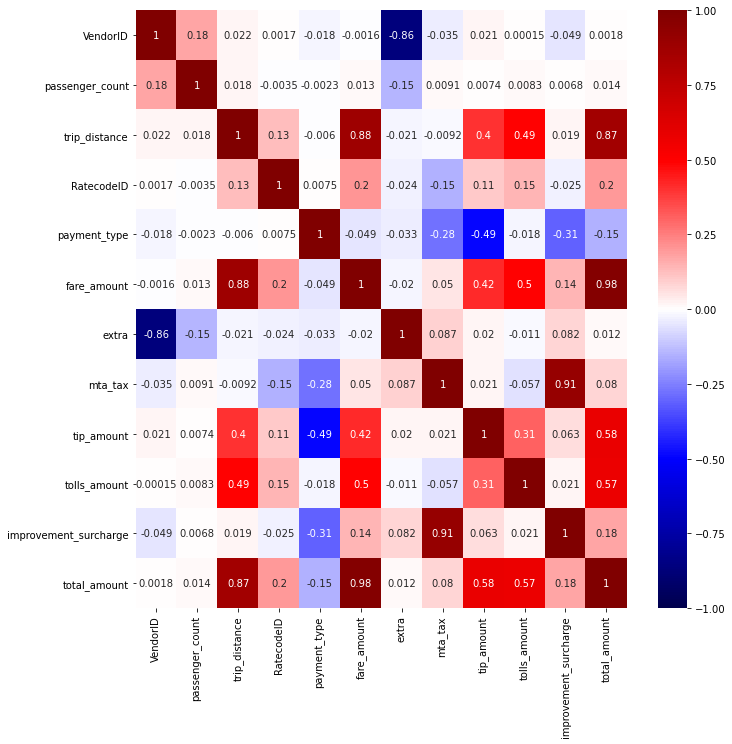

In [30]:
plt.figure(figsize = [11,11])
sns.heatmap(df_train1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


Text(0.5, 1.0, 'Detecting outliers using Boxplot')

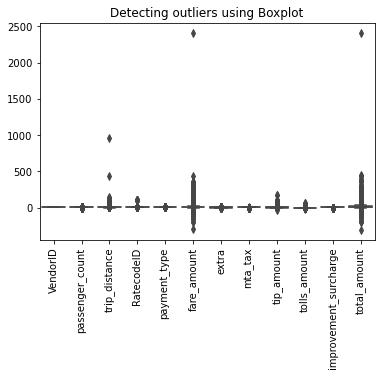

In [22]:
sns.boxplot(data=df_train1);
plt.xticks(rotation = 90)
plt.title("Detecting outliers using Boxplot")

#plt.boxplot(df_train1, vert=False)
#plt.title("Detecting outliers using Boxplot")
#plt.xlabel('df_train1')

In [204]:
X, y = df_train1.drop('total_amount',axis=1), df_train1['total_amount']

In [205]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [210]:
y_lr_train_pred = lr.predict(X)
y_lr_train_pred

array([10.39357011, 17.46496513, 16.3922118 , ..., 12.63130751,
       30.89856845, 14.6987888 ])